# 🧪 Deep Neural Networks Lab – Custom Multi-Class Image Classification with TensorFlow

### 📚 **Objective**

This lab will guide you through the complete process of building a deep neural network for multi-class image classification using only fully connected (Dense) layers. By avoiding Convolutional Neural Networks (CNNs), we will focus on the fundamental pipeline of handling image data for a standard DNN. We will manually perform:

* Loading a custom image dataset from a URL.
* Image preprocessing (resizing, grayscaling, flattening).
* Building a sequential model with Dense layers in TensorFlow.
* Training the model on our custom data.
* Evaluating the model's performance and visualizing the results.

**Dataset:** We will use the **Rock, Paper, Scissors** dataset, which contains thousands of images of hands playing the game, categorized into three classes.

---

### ✅ **Part 1: Setup and Dataset Preparation**

First, we need to download and extract our image dataset. The dataset is organized into three folders: `rock`, `paper`, and `scissors`, which is the ideal structure for our data loading script.

🔸 **1. Download and Unzip the Dataset**

We will use the `!wget` command to download the zipped dataset from a public URL and `!unzip` to extract it into a directory named `dataset/`. The `-q` flag is used for a "quiet" download and extraction, reducing the amount of output.

https://www.kaggle.com/settings

https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors

In [1]:
!pip install kaggle


   ---------------------------------------- 0/5 [webencodings]
   ---------------------------------------- 0/5 [webencodings]
   ---------------- ----------------------- 2/5 [python-slugify]
   ---------------- ----------------------- 2/5 [python-slugify]
   ---------------- ----------------------- 2/5 [python-slugify]
   ------------------------ --------------- 3/5 [bleach]
   ------------------------ --------------- 3/5 [bleach]
   ------------------------ --------------- 3/5 [bleach]
   ------------------------ --------------- 3/5 [bleach]
   ------------------------ --------------- 3/5 [bleach]
   ------------------------ --------------- 3/5 [bleach]
   ------------------------ --------------- 3/5 [bleach]
   ------------------------ --------------- 3/5 [bleach]
   ------------------------ --------------- 3/5 [bleach]
   ------------------------ --------------- 3/5 [bleach]
   ------------------------ --------------- 3/5 [bleach]
   ------------------------ --------------- 3/5 [bl


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# In Google Colab, upload your kaggle.json file first
from google.colab import files
files.upload()  # Upload kaggle.json

# Create .kaggle directory and move file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset
!kaggle datasets download -d drgfreeman/rockpaperscissors


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors
License(s): CC-BY-SA-4.0
100% 306M/306M [00:00<00:00, 525MB/s]
100% 306M/306M [00:00<00:00, 576MB/s]


In [ ]:
!unzip rockpaperscissors.zip -d dataset/

Archive:  rockpaperscissors.zip
  inflating: dataset/README_rpc-cv-images.txt  
  inflating: dataset/paper/04l5I8TqdzF9WDMJ.png  
  inflating: dataset/paper/0Og76sl5CJhbxWWx.png  
  inflating: dataset/paper/0RA9rcrv8iVvuDDU.png  
  inflating: dataset/paper/0Uomd0HvOB33m47I.png  
  inflating: dataset/paper/0a3UtNzl5Ll3sq8K.png  
  inflating: dataset/paper/0cb6cVL8pkfi4wF6.png  
  inflating: dataset/paper/0eqArS2GgsBeqgSn.png  
  inflating: dataset/paper/0t08v9bAaA0mXGCQ.png  
  inflating: dataset/paper/0vugygEjxQJPr9yz.png  
  inflating: dataset/paper/0zKU6wEhT2cDe9j0.png  
  inflating: dataset/paper/14K62H4KG1hg5qiJ.png  
  inflating: dataset/paper/1Dfw5FRlS4h60JPX.png  
  inflating: dataset/paper/1Frbe8cdOdkciOBg.png  
  inflating: dataset/paper/1Tt9U9SzrOm98Xtw.png  
  inflating: dataset/paper/1fKclJk4eBWOQSR1.png  
  inflating: dataset/paper/1jHtb93pI8f6pfKo.png  
  inflating: dataset/paper/1oKnUgV2CdCaQUUX.png  
  inflating: dataset/paper/1uoW7QcH2qAgCTxv.png  
  inflating: dataset

In [ ]:
import os

# Check the current directory structure
for root, dirs, files in os.walk('dataset/'):
    level = root.replace('dataset/', '').count(os.sep)
    indent = ' ' * 2 * level
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 2 * (level + 1)
    for file in files[:3]:  # Show first 3 files
        print(f'{subindent}{file}')
    if len(files) > 3:
        print(f'{subindent}... and {len(files) - 3} more files')


/
  README_rpc-cv-images.txt
paper/
  AqNY2b7NX9Ce3CjZ.png
  n9SDT7R9BSLRNCe1.png
  Mq8Ym2axOJVIthiP.png
  ... and 709 more files
rock/
  oJgp2GfiHRHchjDv.png
  DFi1cIxsQrXxIoWn.png
  WTNxLmYXbSvxjksk.png
  ... and 723 more files
scissors/
  PnuPFf14FGLB9AKu.png
  qguumDPZwrNl7e1C.png
  Gr3EpS7AO3KtWTz0.png
  ... and 747 more files
rps-cv-images/
  README_rpc-cv-images.txt
  paper/
    AqNY2b7NX9Ce3CjZ.png
    n9SDT7R9BSLRNCe1.png
    Mq8Ym2axOJVIthiP.png
    ... and 709 more files
  rock/
    oJgp2GfiHRHchjDv.png
    DFi1cIxsQrXxIoWn.png
    WTNxLmYXbSvxjksk.png
    ... and 723 more files
  scissors/
    PnuPFf14FGLB9AKu.png
    qguumDPZwrNl7e1C.png
    Gr3EpS7AO3KtWTz0.png
    ... and 747 more files


In [ ]:
!rm -rf dataset/rps-cv-images

In [ ]:

print("Dataset downloaded and extracted successfully.")

Dataset downloaded and extracted successfully.


📊 Dataset Overview:
----------------------------------------
Paper: 712 images
Rock: 726 images
Scissors: 750 images
Total: 2188 images
----------------------------------------


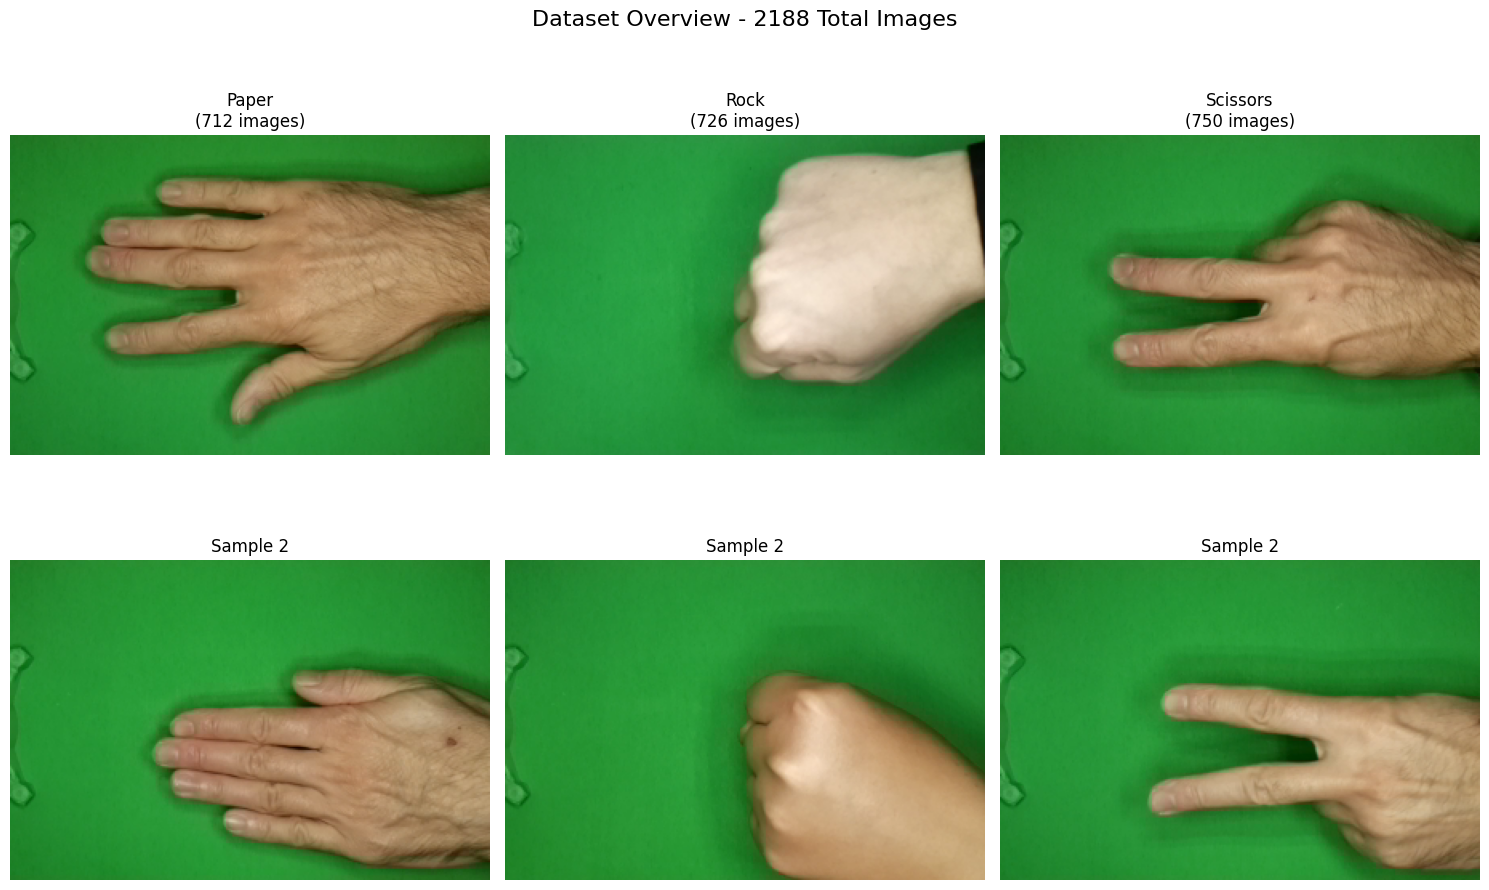

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def display_dataset_overview(data_dir='dataset/'):
    class_names = ['paper', 'rock', 'scissors']

    print("📊 Dataset Overview:")
    print("-" * 40)

    total_images = 0
    class_counts = {}

    # Count images in each class
    for class_name in class_names:
        class_path = os.path.join(data_dir, class_name)
        image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        count = len(image_files)
        class_counts[class_name] = count
        total_images += count
        print(f"{class_name.title()}: {count} images")

    print(f"Total: {total_images} images")
    print("-" * 40)

    # Display sample images with statistics
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle(f'Dataset Overview - {total_images} Total Images', fontsize=16)

    for idx, class_name in enumerate(class_names):
        class_path = os.path.join(data_dir, class_name)
        image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # Display first image from each class
        if image_files:
            img_path = os.path.join(class_path, image_files[0])
            img = Image.open(img_path)

            axes[0, idx].imshow(img)
            axes[0, idx].set_title(f'{class_name.title()}\n({class_counts[class_name]} images)')
            axes[0, idx].axis('off')

            # Display second image from each class
            if len(image_files) > 1:
                img_path = os.path.join(class_path, image_files[1])
                img = Image.open(img_path)
                axes[1, idx].imshow(img)
                axes[1, idx].set_title(f'Sample 2')
                axes[1, idx].axis('off')

    plt.tight_layout()
    plt.show()

# Display overview
display_dataset_overview()


After running the cell above, your file directory should look like this, which is exactly what we need:

```
dataset/
├── rock/
│   ├── rock01-000.png
│   └── ...
├── paper/
│   ├── paper01-000.png
│   └── ...
└── scissors/
    ├── scissors01-000.png
    └── ...
```

---

### ✅ **Part 2: Image Preprocessing and Conversion to Arrays**

With the data in place, our next step is to load the images from their folders, preprocess them into a uniform format, and convert them into numerical arrays (`numpy` arrays) that our neural network can understand.

🔸 **2. Load Images and Labels from Directories**

We will iterate through each class folder (`rock`, `paper`, `scissors`). For each image, we will:
1.  Open it using the Python Imaging Library (`PIL`).
2.  Convert it to **grayscale** (`'L'`) to simplify the data. Color isn't essential for this task, and this reduces the input size.
3.  Resize it to a fixed `img_size` of `(64, 64)` pixels to ensure all input features have the same dimensions.
4.  Convert the processed image into a `numpy` array and add it to our data list `X`.
5.  Assign a numeric `label` (0 for rock, 1 for paper, 2 for scissors) and add it to our labels list `y`.

In [ ]:
import os
import numpy as np
from PIL import Image

data_dir = 'dataset/'
img_size = (64, 64)

X = []
y = []

# Explicitly define the classes you expect
class_names = ['paper', 'rock', 'scissors']
print(f"Class names (and their assigned labels): {list(enumerate(class_names))}")

for label, class_folder in enumerate(class_names):
    class_path = os.path.join(data_dir, class_folder)
    # Skip non-directory files like .DS_Store
    if not os.path.isdir(class_path):
        continue

    for img_file in os.listdir(class_path):
        try:
            img_path = os.path.join(class_path, img_file)
            # Open image and convert to grayscale
            img = Image.open(img_path).convert('L')
            img = img.resize(img_size)

            X.append(np.array(img))
            y.append(label)
        except Exception as e:
            # Skip corrupted or unreadable images
            print(f"Skipping file {img_file}: {e}")

print(f"\nSuccessfully loaded {len(X)} images.")

Class names (and their assigned labels): [(0, 'paper'), (1, 'rock'), (2, 'scissors')]

Successfully loaded 2188 images.


🔸 **3. Convert to NumPy Arrays, Normalize, and Flatten**

Now we convert our Python lists `X` and `y` into `numpy` arrays, which are more efficient for numerical operations.

* **Normalization:** We divide the pixel values of `X` by 255.0. This scales the pixel values from the range `[0, 255]` to `[0, 1]`, which helps the model train more effectively.
* **Flattening:** A standard Dense layer expects a 1D vector as input for each sample. We must therefore "flatten" each 2D image array (64x64) into a 1D array (64 * 64 = 4096 features).

In [ ]:
# Convert lists to numpy arrays
X = 
y = 

X.shape
X

array([[[ 82,  83,  83, ...,  86,  84,  83],
        [ 83,  83,  83, ...,  85,  84,  83],
        [ 83,  84,  84, ...,  85,  83,  83],
        ...,
        [ 86,  88,  88, ...,  91,  89,  89],
        [ 86,  88,  87, ...,  90,  88,  88],
        [ 84,  86,  87, ...,  90,  89,  88]],

       [[ 88,  89,  90, ...,  88,  86,  83],
        [ 90,  89,  90, ...,  87,  86,  85],
        [ 89,  90,  91, ...,  87,  85,  85],
        ...,
        [ 89,  90,  90, ...,  57,  53,  51],
        [ 87,  89,  89, ...,  68,  64,  61],
        [ 86,  88,  88, ...,  74,  72,  68]],

       [[ 82,  83,  84, ...,  87,  86,  83],
        [ 83,  84,  83, ...,  88,  86,  85],
        [ 84,  85,  85, ...,  87,  85,  85],
        ...,
        [ 88,  89,  89, ...,  84,  84,  83],
        [ 87,  89,  90, ...,  86,  95,  99],
        [ 85,  87,  89, ...,  83,  87,  99]],

       ...,

       [[ 83,  84,  83, ...,  89,  87,  86],
        [ 84,  85,  84, ...,  90,  88,  87],
        [ 84,  85,  85, ...,  89,  87,  87

In [ ]:
# Normalize pixel values to be between 0 and 1
X = X / 255.0

# Reshape the data: flatten each image from (64, 64) to (4096,)
X = 
# X = X.reshape(len(X), -1)

print("Data converted and preprocessed.")
print("Shape of X (data):", X.shape)
print("Shape of y (labels):", y.shape)

Data converted and preprocessed.
Shape of X (data): (2188, 4096)
Shape of y (labels): (2188,)


In [ ]:
X

array([[0.32156863, 0.3254902 , 0.3254902 , ..., 0.35294118, 0.34901961,
        0.34509804],
       [0.34509804, 0.34901961, 0.35294118, ..., 0.29019608, 0.28235294,
        0.26666667],
       [0.32156863, 0.3254902 , 0.32941176, ..., 0.3254902 , 0.34117647,
        0.38823529],
       ...,
       [0.3254902 , 0.32941176, 0.3254902 , ..., 0.35686275, 0.34901961,
        0.34509804],
       [0.32156863, 0.32156863, 0.32156863, ..., 0.34509804, 0.34117647,
        0.3372549 ],
       [0.4627451 , 0.46666667, 0.46666667, ..., 0.5254902 , 0.52156863,
        0.51764706]])

---

### ✅ **Part 3: Train-Test Split**

To evaluate our model's performance on unseen data, we need to split our dataset into a training set and a testing set.

* `X_train`, `y_train`: Data the model will learn from.
* `X_test`, `y_test`: Data the model will be evaluated on after training.
* `test_size=0.2`: We allocate 20% of the data for testing.
* `stratify=y`: This ensures that the proportion of classes (`rock`, `paper`, `scissors`) is the same in both the training and testing sets, which is crucial for balanced evaluation.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =   # For reproducibility
)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (1750, 4096)
Testing data shape: (438, 4096)


---

### ✅ **Part 4: Build Deep Neural Network (Fully Connected)**

Now we define the architecture of our **deep neural network** model. We use a `Sequential` model with multiple hidden layers and modern regularization techniques.

**Architecture Overview:**
Our network has **5 layers** with sophisticated regularization and optimization techniques:

#### **Layer-by-Layer Breakdown:**

* **`Dense(512, activation='relu', input_shape=(4096,), kernel_initializer='he_normal')`**:
  - First hidden layer with **512 neurons** (much larger capacity than shallow networks)
  - `relu` activation function introduces non-linearity
  - `input_shape=(4096,)` matches our flattened 64×64 grayscale images
  - `he_normal` initialization: optimal weight initialization for ReLU activations

* **`BatchNormalization()`**:
  - Normalizes inputs to each layer, stabilizing and accelerating training
  - Reduces internal covariate shift and allows higher learning rates
  - Acts as additional regularization

* **`Dropout(0.3)`**:
  - Randomly sets 30% of neurons to zero during training
  - Prevents overfitting by reducing neuron co-dependency
  - Not applied during inference

* **`Dense(256, activation='relu', kernel_initializer='he_normal')`**:
  - Second hidden layer with **256 neurons** (progressively smaller)
  - Continues feature abstraction at a deeper level

* **`BatchNormalization()` + `Dropout(0.4)`**:
  - Higher dropout rate (40%) for stronger regularization
  - Batch normalization for training stability

* **`Dense(128, activation='relu', kernel_initializer='he_normal')`**:
  - Third hidden layer with **128 neurons**
  - Further feature refinement and abstraction

* **`BatchNormalization()` + `Dropout(0.3)`**:
  - Consistent regularization pattern throughout the network

* **`Dense(64, activation='relu')`**:
  - Fourth hidden layer with **64 neurons**
  - Final feature extraction before classification

* **`Dense(3, activation='softmax', kernel_initializer='glorot_uniform')`**:
  - Output layer with **3 neurons** (one per class: paper, rock, scissors)
  - `softmax` activation converts raw scores to probability distribution
  - `glorot_uniform` initialization: optimal for softmax outputs

#### **Key Deep Learning Concepts:**

**🔹 Deep Architecture:** Multiple hidden layers allow the network to learn hierarchical feature representations

**🔹 Batch Normalization:** Modern technique that normalizes layer inputs, enabling faster training and better convergence

**🔹 Progressive Layer Sizing:** Gradually decreasing neuron counts (512→256→128→64→3) create a funnel-like architecture for feature abstraction

**🔹 Proper Weight Initialization:** `he_normal` for ReLU layers and `glorot_uniform` for softmax ensure optimal starting weights

**🔹 Regularization Strategy:** Multiple dropout layers with varying rates prevent overfitting in this deep architecture

This architecture demonstrates how **depth** in neural networks can capture complex patterns in image data, even without convolutional layers.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Dense(),
    BatchNormalization(),
    Dropout(0.3),
    Dense(),
    BatchNormalization(),
    Dropout(0.4),
    Dense(),
    BatchNormalization(),
    Dropout(0.3),
    Dense(),
    Dense(3, activation='softmax',kernel_initializer='glorot_uniform')
])



# Display the model's architecture
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,273,923 (8.67 MB)

 Trainable params: 2,272,131 (8.67 MB)

 Non-trainable params: 1,792 (7.00 KB)

---

### ✅ **Part 5: Compile and Train Model**

Before we can train the model, we need to configure its learning process using `compile()`.

* **`optimizer='adam'`**: Adam is an efficient and popular optimization algorithm that adjusts the model's weights during training.
* **`loss='sparse_categorical_crossentropy'`**: This is the correct loss function for a multi-class classification problem where the labels (`y_train`) are provided as integers (0, 1, 2...).
* **`metrics=['accuracy']`**: We want to monitor the accuracy of the model during and after training.

We then train the model using `fit()`, running for `15 epochs` (15 passes over the entire training dataset). We also use a `validation_split` of 0.2, which sets aside 20% of the *training* data to evaluate the model's performance on data it isn't directly learning from at the end of each epoch. This helps us monitor for overfitting.

In [ ]:
# Use a higher initial learning rate with better scheduling
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.01),  # Higher initial LR
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


# Add early stopping and learning rate reduction
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

callbacks = [
    EarlyStopping(patience=20, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.5, patience=5)
]

history = model.fit(X_train, y_train, epochs=100,
          validation_split=0.2, callbacks=callbacks)


Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.4703 - loss: 1.2421 - val_accuracy: 0.3457 - val_loss: 8.5582 - learning_rate: 0.0100
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6258 - loss: 0.8477 - val_accuracy: 0.3457 - val_loss: 3.8356 - learning_rate: 0.0100
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7225 - loss: 0.6556 - val_accuracy: 0.3914 - val_loss: 1.5866 - learning_rate: 0.0100
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7446 - loss: 0.5996 - val_accuracy: 0.4171 - val_loss: 1.7703 - learning_rate: 0.0100
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7632 - loss: 0.6000 - val_accuracy: 0.5371 - val_loss: 1.1775 - learning_rate: 0.0100
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7866 - loss: 0.5092 - val_accuracy: 0.5543 - val_loss: 1.4130 - learning_rate: 0.0100
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8036 - loss: 0.4775 - 

---

### ✅ **Part 6: Evaluate and Visualize Results**

Now that the model is trained, let's see how well it performs.

🔸 **1. Evaluate on the Test Set**

We use `model.evaluate()` with our held-out test set (`X_test`, `y_test`) to get the final, unbiased performance metrics.

In [ ]:
# Evaluate the model on the unseen test data
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {acc*100:.2f}%")
print(f"Test Loss: {loss:.4f}")


Test Accuracy: 92.92%
Test Loss: 0.2251


🔸 **2. Plot Training & Validation Curves**

Visualizing the training history is a great way to understand the model's learning progress. We will plot both the accuracy and the loss for the training and validation sets over the epochs.

* An increasing accuracy and decreasing loss indicates the model is learning.
* A large gap between the training and validation curves can be a sign of overfitting.

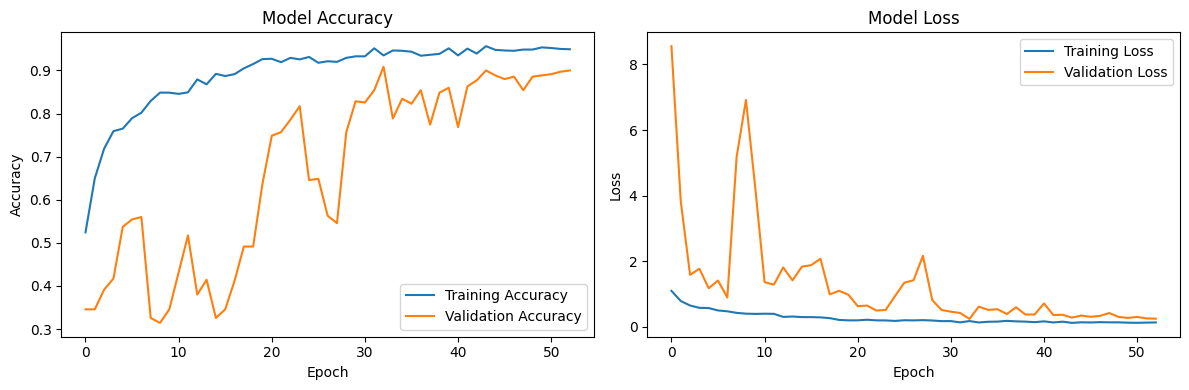

In [ ]:
import matplotlib.pyplot as plt

# Plotting Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

🔸 **3. Predict and Visualize Individual Results**

Finally, let's make predictions on a few test images and see how our model performs visually. We will display the image and label it with the model's prediction alongside the true "Actual" label.

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


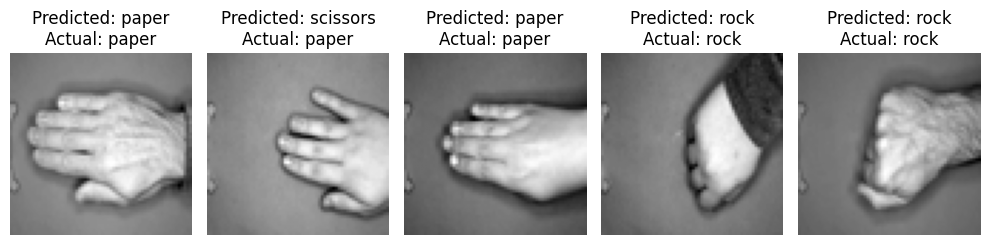

In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Show 5 random test images with their predicted and actual labels
plt.figure(figsize=(10, 10))
for i in range(5):
    # Choose a random index
    idx = np.random.randint(0, len(X_test))

    # Reshape the flattened data back to a 2D image
    image = X_test[idx].reshape(img_size)

    plt.subplot(1, 5, i + 1)
    plt.imshow(image, cmap='gray')

    predicted_label = class_names[predicted_classes[idx]]
    actual_label = class_names[y_test[idx]]

    plt.title(f"Predicted: {predicted_label}\nActual: {actual_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

---

### 🧠 **Learning Outcomes**

By completing this lab, you have successfully:

* Implemented a full image classification pipeline from data loading to evaluation.
* Understood how to manually preprocess image data (load, resize, grayscale, normalize) and flatten it for a Dense neural network.
* Applied `softmax` activation and `sparse_categorical_crossentropy` loss for a multi-class classification task.
* Measured model generalization using a validation set during training and a final test set.
* Visualized training history and prediction results to interpret model performance.

### 📌 **Bonus Ideas (Optional Extensions)**

* **Deeper Network:** Add more `Dense` and `Dropout` layers to see if performance improves or if the model starts to overfit.
* **Early Stopping:** Implement `tf.keras.callbacks.EarlyStopping` to automatically stop training when the validation loss stops improving.
* **Hyperparameter Tuning:** Experiment with different learning rates for the Adam optimizer, different dropout rates, or a different number of neurons in the layers.
* **Save/Load Model:** Use `model.save('my_model.h5')` to save your trained model and `tf.keras.models.load_model('my_model.h5')` to load it back without needing to retrain.